# Deep neural network

In this notebook we build neural networks that can learn complex kinds of relationships by assembling simple components (linear units).

### Layers

Neural networks typically organize their neurons into __layers__ and when we collect together linear units having a common set of inputs we get a __dense__ layer.

- __Layers__: Neurons are organized into layers. Each layer applies a transformation to its input.
- __Dense layer__: A layer where all inputs are connect to every neuron.

### Activation Function

An __activation function__ is simply some function we apply to each of a layer's outputs (its activations).

### Stacking Dense Layers

<p align="center">
  <img src="https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png" alt="diagram">
</p>

The layers before the output layer are sometimes called the hidden layer since we never see their outputs directly.

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
concrete_data = pd.read_csv('data/concrete.csv')

In [71]:
concrete_data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [72]:
concrete_data.shape

(1030, 9)

In [73]:
input_shape = [8]

In [74]:
model = keras.Sequential([
    # Hidden ReLU layers
    layers.Dense(512, input_shape=[2]),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    # linear output layer
    layers.Dense(1)])

/home/rownak/Documents/projects/intro-deeplearning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
len(model.weights)

8

In [76]:
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

In [77]:
len(model.weights)

6

In [88]:
def get_graph(name):
    activation_layer = layers.Activation(name)
    x = tf.linspace(-3.0, 3.0, 100)
    y = activation_layer(x)

    plt.figure(dpi=100)
    plt.figure(figsize=(4,2))
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.show()

relu


<Figure size 640x480 with 0 Axes>

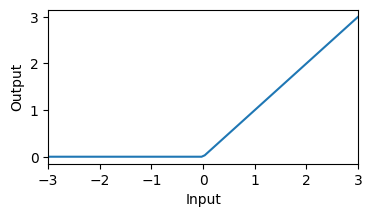

elu


<Figure size 640x480 with 0 Axes>

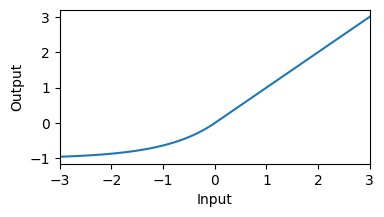

selu


<Figure size 640x480 with 0 Axes>

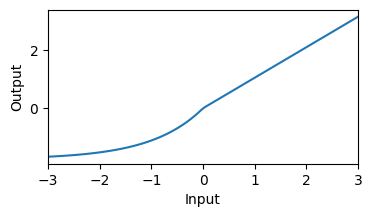

swish


<Figure size 640x480 with 0 Axes>

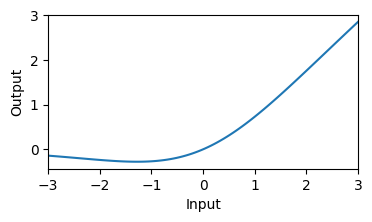

In [91]:
# activation varients
names = ['relu', 'elu', 'selu', 'swish']

for name in names:
    print(name)
    get_graph(name)